In [4]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [217]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [218]:
rng = np.random.RandomState(4)
X_tot = rng.uniform(0, 5, 50).reshape(-1,1)
y_tot = np.sin((X_tot[:,0] - 2.5) ** 2)

In [223]:
sigma = 1
kernel = sigma * RBF(length_scale=.25, length_scale_bounds=(1e-1, 10.0))
gp = GaussianProcessRegressor(kernel=kernel, alpha=.1)

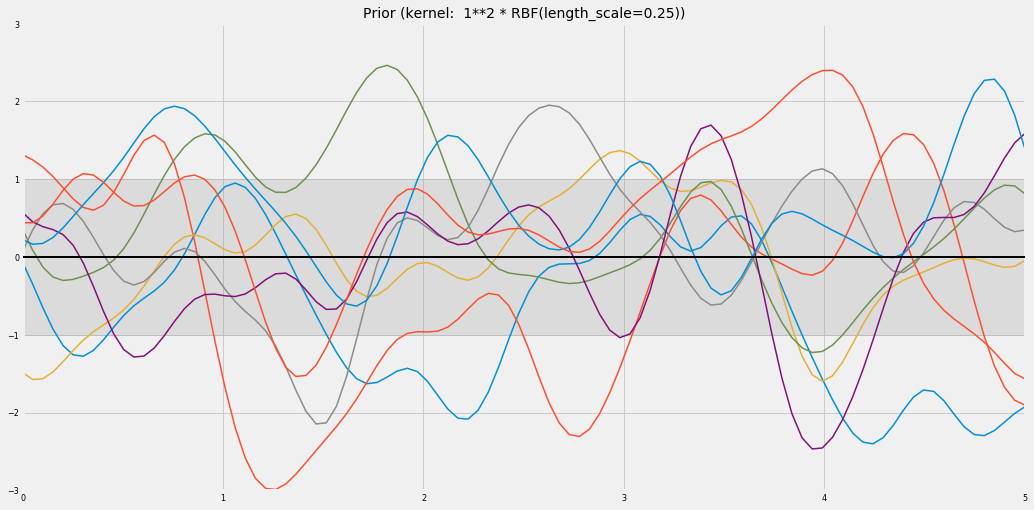

In [224]:
# Plot prior
plt.figure(figsize=(16, 8))
x = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, y_mean, c='k', lw=2, zorder=9)
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.2, color=colors[4])
y_samples = gp.sample_y(x.reshape(-1,1), 8)
plt.plot(x, y_samples, lw=1.5)
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel, fontsize=14)
plt.show()

In [225]:
n = 5
X = X_tot[:n]
y = y_tot[:n]
gp = gp.fit(X, y)

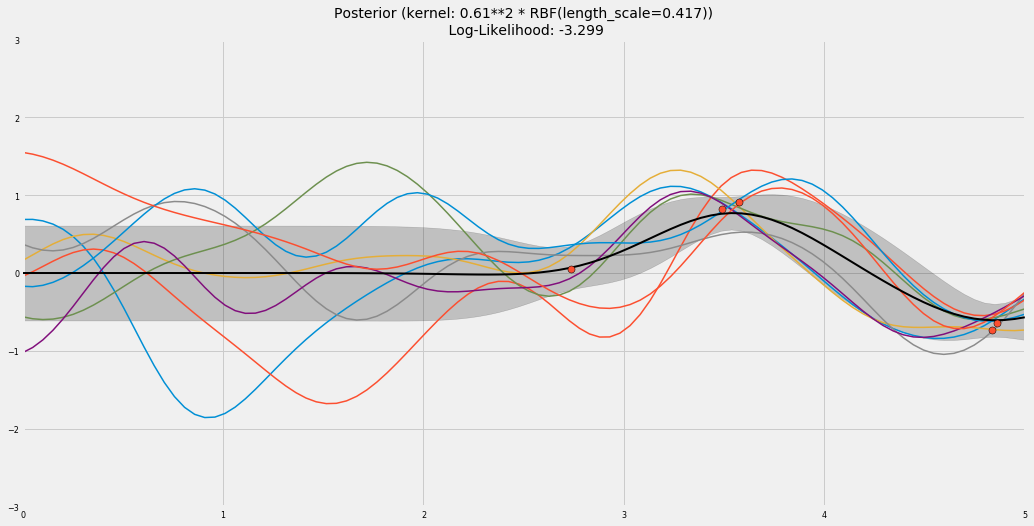

In [226]:
# Plot posterior
plt.figure(figsize=(16, 8))
x = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, y_mean, 'k', lw=2, zorder=9)
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(x.reshape(-1,1), 8)
plt.plot(x, y_samples, lw=1.5)
plt.scatter(X[:, 0], y, c=colors[1], s=50, zorder=10, edgecolors=(0, 0, 0))
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=14)
plt.show()